In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [7]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [8]:
df.shape

(10000, 12)

<ipython-input-9-6eba7e1ab7ef>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


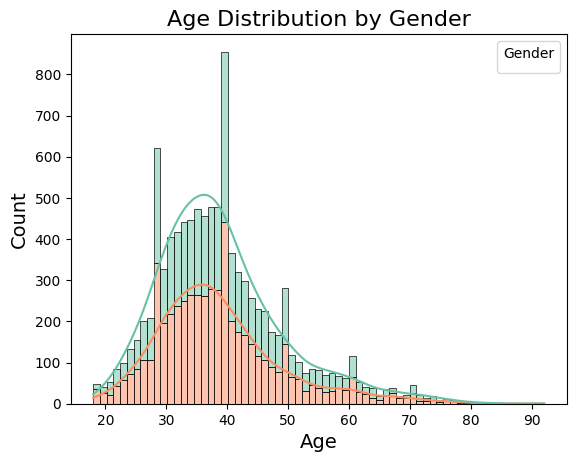

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='age', hue='gender', kde=True, palette='Set2', multiple='stack')
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender')
plt.show()

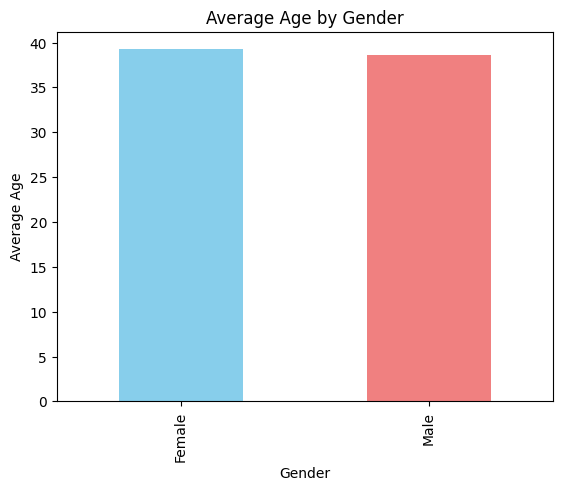

In [10]:
gender_age=df.groupby('gender')['age'].mean()
gender_age.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

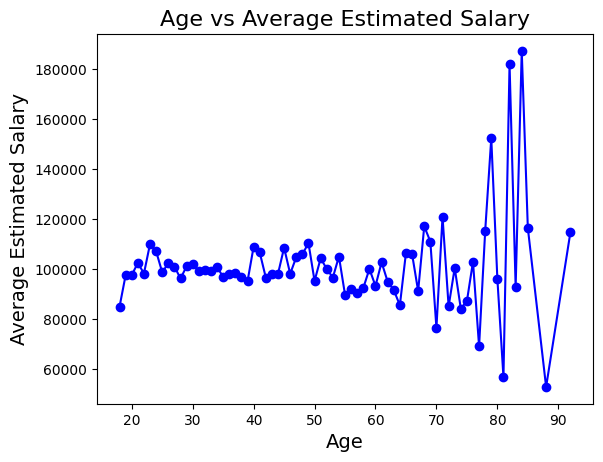

In [11]:
age_salary=df.groupby('age')['estimated_salary'].mean()
plt.plot(age_salary.index, age_salary.values, marker='o', color='blue')
plt.title('Age vs Average Estimated Salary', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Estimated Salary', fontsize=14)
plt.show()



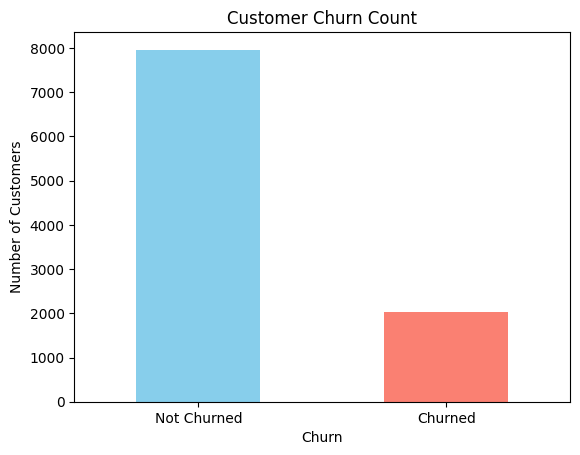

In [12]:
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)
plt.show()

In [13]:

df.select_dtypes(include=['object'])


,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [14]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['gender']=le.fit_transform(df['gender'])

In [16]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
x=df.drop(['churn','customer_id', 'credit_score'],axis=1)
y=df['churn']

In [18]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x = sc.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#**LogisticRegression**

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=lr.predict(x_test)
cm_lr=confusion_matrix(y_test,y_pred)
print(cm_lr)
print(classification_report(y_test, y_pred))

[[1558   49]
 [ 329   64]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.57      0.16      0.25       393

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.57      2000
weighted avg       0.77      0.81      0.77      2000



#**DecisionTreeClassifier**

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_dt=dt.predict(x_test)
cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm_dt)
print(classification_report(y_test,y_pred_dt))

[[1552   55]
 [ 234  159]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1607
           1       0.74      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.86      0.84      2000



#**RandomForest**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_rf=rf.predict(x_test)
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)
print(classification_report(y_test,y_pred_rf))

[[1544   63]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#**XG Boost**

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
y_pred_xgb=xgb_model.predict(x_test)
cm_xgb=confusion_matrix(y_test,y_pred_xgb)
print(cm_xgb)
print(classification_report(y_test,y_pred_xgb))

[[1523   84]
 [ 196  197]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.50      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

